In [1]:
# Importing Needed packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import os
%matplotlib inline

In [2]:
# Reading the data
os.chdir(r'C:\Users\apega\My py notes\Python for Data Science\other saved files')

df = pd.read_csv('student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [3]:
# summarize the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Now, lets plot Hours vs Scores, to see how linear is their relation:

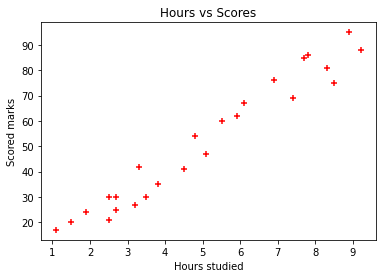

In [5]:
plt.scatter(df.Hours, df.Scores, color = 'r', marker = '+')

plt.xlabel("Hours studied")
plt.ylabel("Scored marks")
plt.title('Hours vs Scores')
plt.show()

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values  
X[:5], y[:5]

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5]]),
 array([21, 47, 27, 75, 30], dtype=int64))

# Spliting data into train and test sets


In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 

# flashML

In [8]:
!pip install flashML==0.1.3

In [9]:
from flashML import autoML

aml = autoML()
aml.fit(X_train, X_test, y_train, y_test, "regression", "r2_score")

model name:  RandomForestRegressor  Best params:  {'n_estimators': 57, 'max_depth': 3}  Score:  0.8547138850955884
model name:  ExtraTreesRegressor  Best params:  {'n_estimators': 34, 'max_depth': 2}  Score:  0.9078019205204959
model name:  LinearRegression  Best params:  {}  Score:  0.9298077534821834
model name:  CatBoostRegressor  Best params:  {'learning_rate': 0.06999999999999999, 'depth': 2, 'n_estimators': 92}  Score:  0.9096048523195301
model name:  LGBMRegressor  Best params:  {'learning_rate': 0.09, 'n_estimators': 10}  Score:  -0.45280048402216955


D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:598: UserWarni

In [10]:
aml.get_best_model()

'LinearRegression'

In [11]:
aml.predict(X_test)[:8]

array([20.675     , 37.72916667, 83.59375   ])

# Modeling: 

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.85475541]
Intercept:  2.52007670686622


In [13]:
# We can plot the fit line over the data:

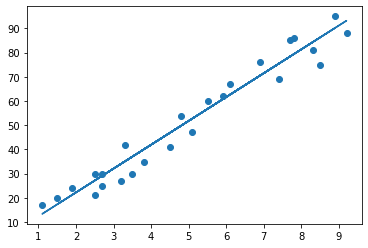

In [14]:
plt.scatter(X, y)
plt.plot(X ,regr.coef_*X+regr.intercept_ );
plt.show()

# Predictions

In [15]:
yhat = regr.predict(X_test) 

In [16]:
# Comparing Actual vs Predicted 
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})  
df 

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


# Evaluating

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat)) 
print("r2_score: ", metrics.r2_score(y_test, yhat))

Mean Absolute Error: 5.399450313612012
r2_score:  0.9298077534821834


In [18]:
# predicting score of a student who studied for 9.25 hrs/ day:
own_pred = regr.predict(np.array([9]).reshape(1, 1))
print("No of Hours = {}".format(9))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9
Predicted Score = 91.2128753998034


# Save the model

In [19]:
os.chdir(r'C:\Users\apega\My py notes\Machine Learning\My ML Projects\models')
import pickle 
pickle.dump(regr,open("simple.pkl","wb"))